# Data Visualization exercise

In [39]:
# importing the package(s) we want to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
### The input file is tab-delimited
tsv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsv_Filepath, sep='\t')

In [56]:
### Using .head() and .tail() to see data content
euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.67600,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.66900,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.04600,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.92400,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.34900,35.6991,31200,37660,2010,Chromosome
5,Hordeum vulgare,Plants,Land Plants,4006.12000,44.3,-,-,2019,Scaffold
6,Oryza sativa Japonica Group,Plants,Land Plants,374.42300,43.5769,35219,42580,2015,Chromosome
7,Triticum aestivum,Plants,Land Plants,14547.30000,46.0544,-,-,2018,Chromosome
8,Saccharomyces cerevisiae S288C,Fungi,Ascomycetes,12.15710,38.1556,6445,6002,1999,Complete Genome
9,Zea mays,Plants,Land Plants,2135.08000,46.9109,49296,58411,2010,Chromosome


In [42]:
### .info() to provide information on the data
euk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


In [78]:
### What to do with '-' values?
## Change "-" into NAs
euk.replace('-', 'NA', inplace=True)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.6760,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.6690,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.0460,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.9240,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.3490,35.6991,31200,37660,2010,Chromosome
5,Hordeum vulgare,Plants,Land Plants,4006.1200,44.3,NA,NA,2019,Scaffold
6,Oryza sativa Japonica Group,Plants,Land Plants,374.4230,43.5769,35219,42580,2015,Chromosome
7,Triticum aestivum,Plants,Land Plants,14547.3000,46.0544,NA,NA,2018,Chromosome
8,Saccharomyces cerevisiae S288C,Fungi,Ascomycetes,12.1571,38.1556,6445,6002,1999,Complete Genome
9,Zea mays,Plants,Land Plants,2135.0800,46.9109,49296,58411,2010,Chromosome


## Visualize the relationship between two variables

Can you see the relationship between genome size and the number of genes?



It is hard for us to see patterns by reading large tables of data. For example, look at the following table that contains the genome size and the number of genes for reptiles. Can you see the relationship between genome size and the number of genes?

In [94]:
## Look only look at reptile data using class 'Reptiles'
euk['Class'] == 'Reptiles'

0       False
1       False
2       False
3       False
4       False
        ...  
8297    False
8298    False
8299    False
8300    False
8301    False
Name: Class, Length: 8302, dtype: bool

In [112]:
## Pick out data for just Reptiles with genome size < 4000
reptile_data = euk[(euk['Class'] == 'Reptiles') & (euk['Size (Mb)'] < 4000)]


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2962628556.py, line 2)

### Use `relplot` to look at relationships
We will use the `relplot` function, and the names of the columns that we want on the `X` and `Y` axes to look at the relationship between genome size and number of genes in Reptiles

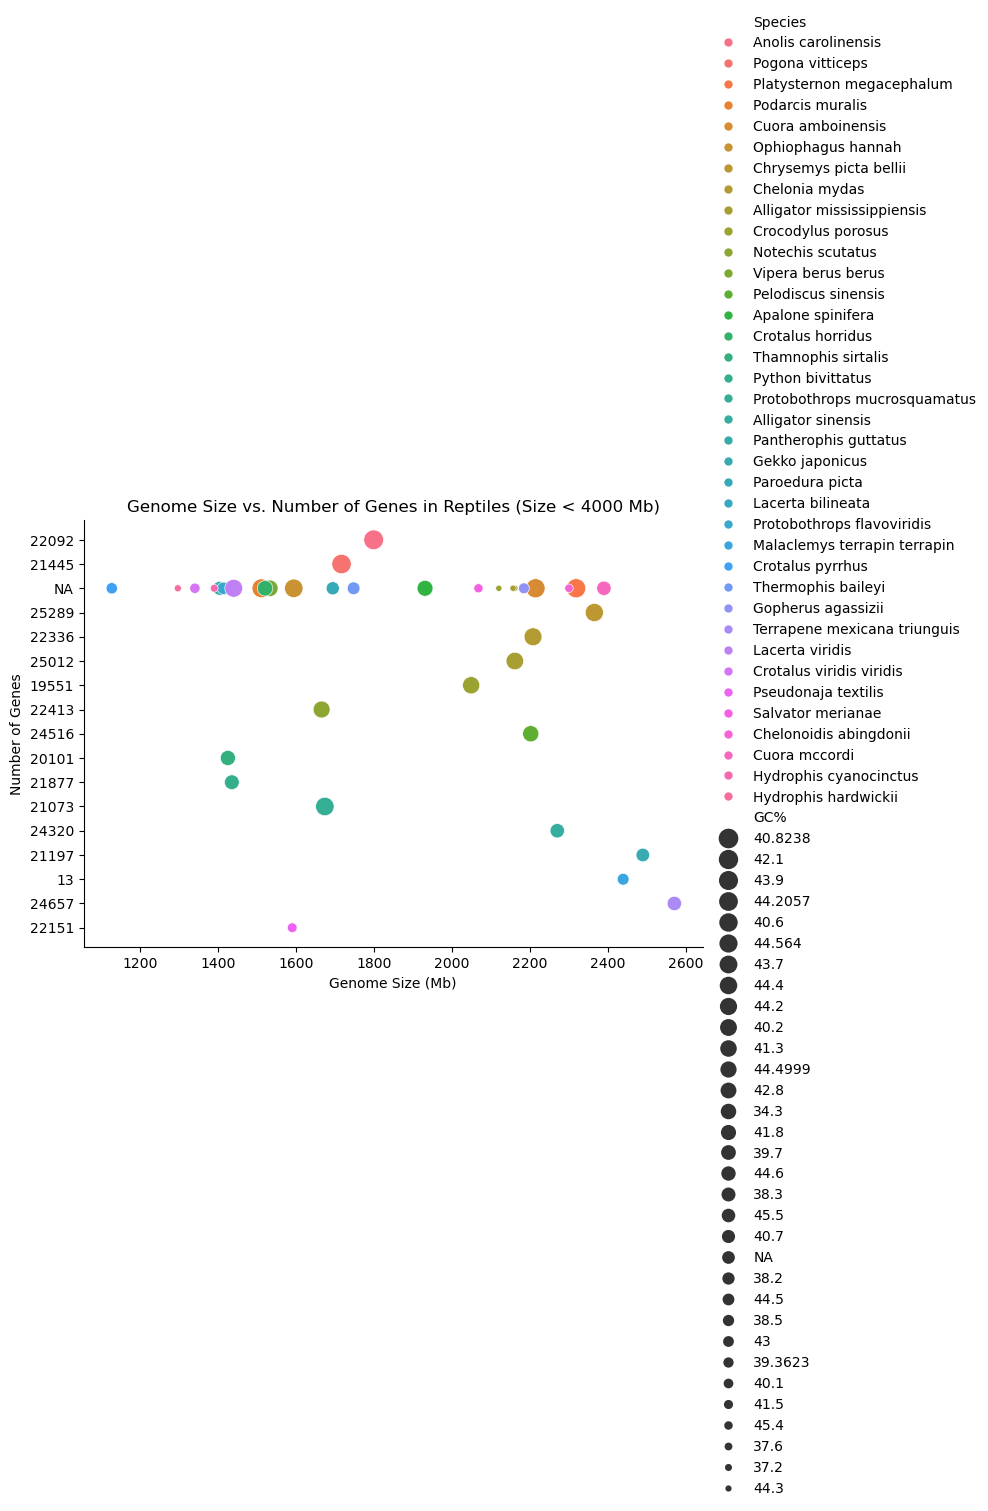

In [102]:
### Relationship plot between genome size and number of genes in Retiles
sns.relplot(
    data=reptile_data,
    x="Size (Mb)",
    y="Number of genes",
    hue="Species",  # Color by species
    size="GC%",     # adjust point size by GC content
    sizes=(20, 200),  # Adjust size range for better visibility
    aspect=1.5
)

# Customize the plot
plt.title("Genome Size vs. Number of Genes in Reptiles (Size < 4000 Mb)")
plt.xlabel("Genome Size (Mb)")
plt.ylabel("Number of Genes")

# Show the plot
plt.show()


### Can you create a new column to look at gene density?
gene density = Number of genes / Size (Mb)

In [116]:
### Your Code
# gene density = Number of genes / Size (Mb)
# create the new column
euk['Size (Mb)'] = pd.to_numeric(euk['Size (Mb)'], errors='coerce')
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors='coerce')
euk['Gene Density'] = euk['Number of genes'] / euk['Size (Mb)']
euk.to_csv(tsv_Filepath, index=False)

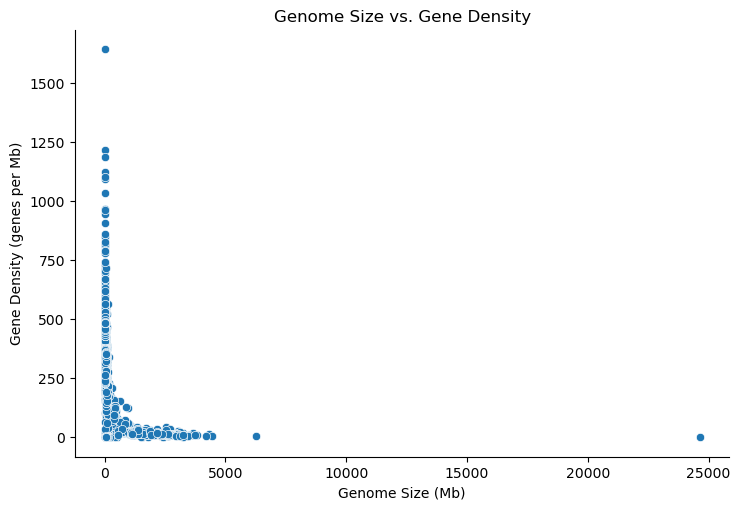

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated 'Gene Density' in the 'euk' DataFrame
# You can filter or plot the whole data depending on what you need
sns.relplot(
    data=euk,  # Use 'euk' DataFrame that contains 'Size (Mb)' and 'Gene Density'
    x="Size (Mb)",
    y="Gene Density",
    sizes=(20, 200),  # Adjust size range for better visibility
    aspect=1.5
)

# Customize the plot with labels and title
plt.title("Genome Size vs. Gene Density")
plt.xlabel("Genome Size (Mb)")
plt.ylabel("Gene Density (genes per Mb)")

# Show the plot
plt.show()

## Seaborn
These are other `kind` plots that we did not try in lectures. Look up seaborn documentation and try to create these new plots.

1.   Create a violin plot for genome size distribution against Class Land Plants.
2.   Create a scatter plot showing the relationship between Kingdom and Publication year
3. Create a bar plot for GC% for each Kingdom

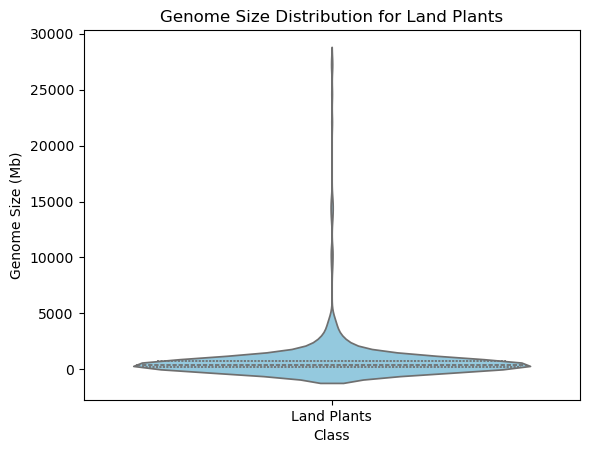

In [122]:
### Your code - Create a violin plot for genome size distribution against Class Land Plants.
land_plants = euk[euk['Class'] == 'Land Plants']

sns.violinplot(data=land_plants, x='Class', y='Size (Mb)', inner='quart', color='skyblue')

plt.title("Genome Size Distribution for Land Plants")
plt.xlabel("Class")
plt.ylabel("Genome Size (Mb)")

# Show the plot
plt.show()


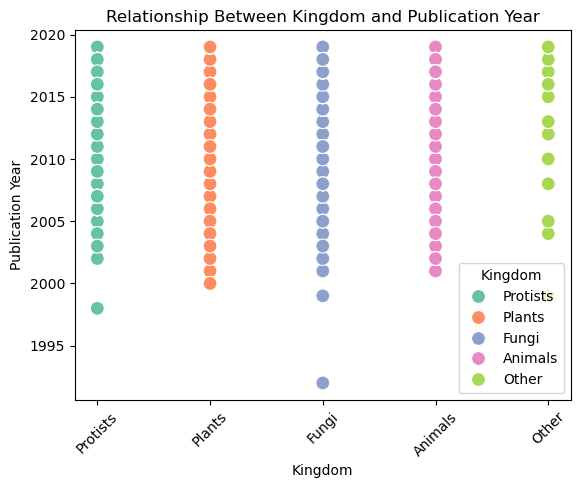

In [124]:
### Your code - Create a scatter plot showing the relationship between Kingdom and Publication year
sns.scatterplot(data=euk, x='Kingdom', y='Publication year', hue='Kingdom', palette='Set2', s=100)

plt.title("Relationship Between Kingdom and Publication Year")
plt.xlabel("Kingdom")
plt.ylabel("Publication Year")

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility if needed
plt.show()

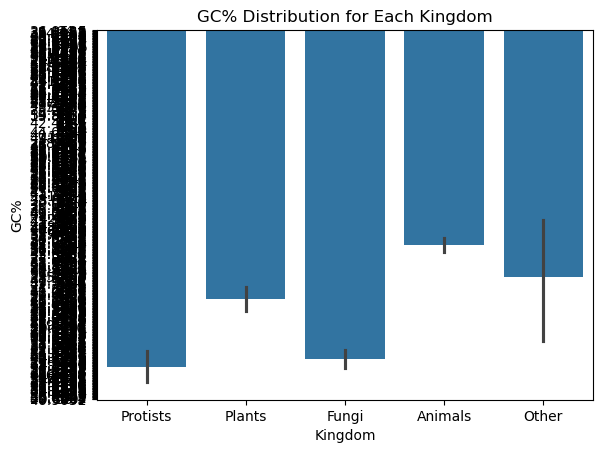

In [132]:
### Your code - Create a bar plot for GC% for each Kingdom
sns.barplot(data=euk, x='Kingdom', y='GC%')

plt.title("GC% Distribution for Each Kingdom")
plt.xlabel("Kingdom")
plt.ylabel("GC%")

# Show the plot
plt.show()